In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train_full.dtype)
print(X_test.dtype)
print(y_train_full.dtype)
print(y_test.dtype)

uint8
uint8
uint8
uint8


In [4]:
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
print(y_train)

[4 0 7 ... 3 0 5]


In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

#Creating the Model using the Sequential API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
#None means batch size can be anything.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

#Compile and Train the Model

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7168 - accuracy: 0.7642 - val_loss: 0.5201 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4900 - accuracy: 0.8283 - val_loss: 0.4824 - val_accuracy: 0.8314
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4422 - accuracy: 0.8460 - val_loss: 0.4328 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4158 - accuracy: 0.8541 - val_loss: 0.3967 - val_accuracy: 0.8670
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3953 - accuracy: 0.8609 - val_loss: 0.3822 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3803 - accuracy: 0.8662 - val_loss: 0.3746 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3661 - accuracy: 0.8695 - val_loss: 0.3773 - val_accuracy:

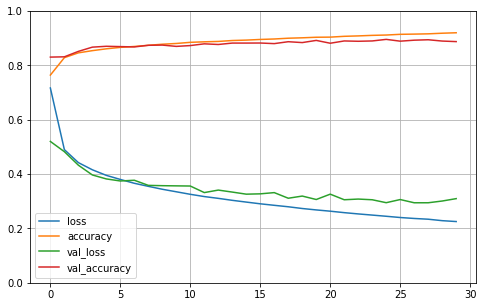

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #set the vertical range to [0-1]
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 62.2105 - accuracy: 0.8524


[62.21052551269531, 0.852400004863739]

#Make Predictions with this Model

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [16]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
import numpy as np
y_pred_cls = np.argmax(y_proba, axis=1)

In [19]:
y_pred_cls

array([9, 2, 1])

In [20]:
np.array(class_names)[y_pred_cls]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
#see original results
y_new = y_test[:3]
print(y_new)

[9 2 1]
